# Libraries

In [10]:
import numpy as np
import pandas as pd
import kagglehub
import os


In [15]:
# dataset taken from "https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews"

# Download the dataset
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

# Dynamically identify the file without showing the local path
files = os.listdir(path)  # List all files in the dataset directory
csv_file = [f for f in files if f.endswith(".csv")][0]  # Find the CSV file
df = pd.read_csv(os.path.join(path, csv_file))

In [16]:
# Display the data
display(df.head())
display(df.info())
display(df.describe(include="all"))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


None

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
count,568454.000000,568454,568454,568428,568454.000000,568454.00000,568454.000000,5.684540e+05,568427,568454
unique,NaN,74258,256059,218415,NaN,NaN,NaN,NaN,295742,393579
top,NaN,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",NaN,NaN,NaN,NaN,Delicious!,"This review will make me sound really stupid, ..."
freq,NaN,913,448,451,NaN,NaN,NaN,NaN,2462,199
mean,284227.500000,NaN,NaN,NaN,1.743817,2.22881,4.183199,1.296257e+09,NaN,NaN
std,164098.679298,NaN,NaN,NaN,7.636513,8.28974,1.310436,4.804331e+07,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.00000,1.000000,9.393408e+08,NaN,NaN
25%,142114.250000,NaN,NaN,NaN,0.000000,0.00000,4.000000,1.271290e+09,NaN,NaN
50%,284227.500000,NaN,NaN,NaN,0.000000,1.00000,5.000000,1.311120e+09,NaN,NaN
75%,426340.750000,NaN,NaN,NaN,2.000000,2.00000,5.000000,1.332720e+09,NaN,NaN


# Data Cleaning

In [17]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [18]:
df = df.drop(columns = ['ProfileName', 'Id'])
df = df.dropna(subset=['Summary'])

# Verify the changes
print(df.info())  
print(f"Remaining rows: {df.shape[0]}")  # Check number of remaining rows

<class 'pandas.core.frame.DataFrame'>
Index: 568427 entries, 0 to 568453
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568427 non-null  object
 1   UserId                  568427 non-null  object
 2   HelpfulnessNumerator    568427 non-null  int64 
 3   HelpfulnessDenominator  568427 non-null  int64 
 4   Score                   568427 non-null  int64 
 5   Time                    568427 non-null  int64 
 6   Summary                 568427 non-null  object
 7   Text                    568427 non-null  object
dtypes: int64(4), object(4)
memory usage: 39.0+ MB
None
Remaining rows: 568427


In [20]:
df['Score'].unique()
# Score follows the usual convention of descending order, whereby 5 is the best and 1 is the worst score. Let's build a map

array([5, 1, 4, 2, 3])

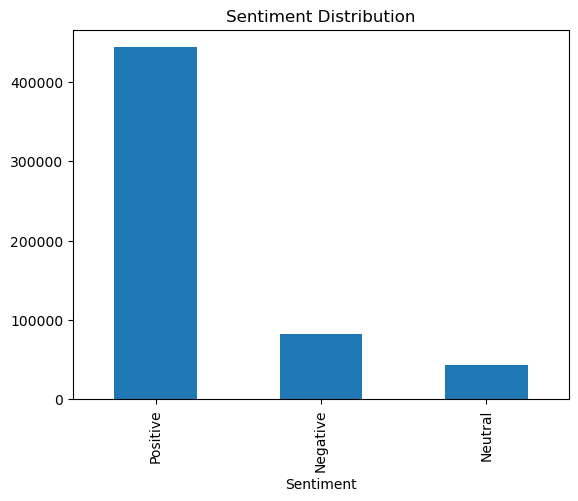

In [ ]:
def map_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df['Sentiment'] = df['Score'].apply(map_sentiment)

import matplotlib.pyplot as plt
df['Sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()